# Notebook error analysis 

## Manual labels of the sampled errors

in terms of bug types and root causes

Filter out / exclude:

    ML_pipeline == non-applicable/unknown
    Other==self-raised/should exclude/intentional

In [1]:
# import importlib
# importlib.reload(config)
# import config

In [1]:
import pandas as pd
import config
import visualization_util

# summed config
# config
df_mlerr_label_config_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_config_sum.xlsx'),
                                keep_default_na=False)
exclude_config = ["label_if_error_chain"] # because it is the same as root cause==nb specific-previous cell error
df_mlerr_label_config_sum.drop(exclude_config, axis=1, inplace=True)
# data
df_mlerr_labels_g_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_g_sum.xlsx'))
df_mlerr_labels_k_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_k_sum.xlsx'))

path_default=WindowsPath('C:/Users/yirwa29/Downloads/Dataset-Nb')


In [2]:
# before filtering
print(df_mlerr_labels_g_sum.eid.nunique())
print(df_mlerr_labels_k_sum.eid.nunique())

390
356


In [3]:
exclude_other = ['should exclude'] #[should exclude']
exclude_ml_pipeline_sum = []#['not applicable','unknown']
# df_mlerr_labels_g_exed = df_mlerr_labels_g[(~df_mlerr_labels_g.label_ML_pipeline.isin(exclude_ml_pipeline))&(~df_mlerr_labels_g.other.isin(exclude_other))]
# df_mlerr_labels_k_exed = df_mlerr_labels_k[(~df_mlerr_labels_k.label_ML_pipeline.isin(exclude_ml_pipeline))&(~df_mlerr_labels_k.other.isin(exclude_other))]
df_mlerr_labels_g_sum = df_mlerr_labels_g_sum[(~df_mlerr_labels_g_sum.label_ML_pipeline.isin(exclude_ml_pipeline_sum))&(~df_mlerr_labels_g_sum.other.isin(exclude_other))]
df_mlerr_labels_k_sum = df_mlerr_labels_k_sum[(~df_mlerr_labels_k_sum.label_ML_pipeline.isin(exclude_ml_pipeline_sum))&(~df_mlerr_labels_k_sum.other.isin(exclude_other))]

In [4]:
# after filtering
print(df_mlerr_labels_g_sum.eid.nunique())
print(df_mlerr_labels_k_sum.eid.nunique())

389
354


[cmap](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

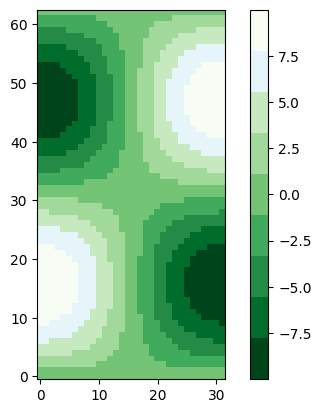

In [8]:
# define cmap with RGB values

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

mycolors = np.array([
    [247,252,245],
    [229,245,249],
    [199,233,192],
    [161,217,155],
    [116,196,118],
    [65,171,93],
    [35,139,69],
    [0,109,44],
    [0,68,27]])/255
cm = LinearSegmentedColormap.from_list('mycolors', mycolors[::-1], N=len(mycolors))

# Fewer bins will result in "coarser" colomap interpolation
im = plt.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
plt.colorbar(im)

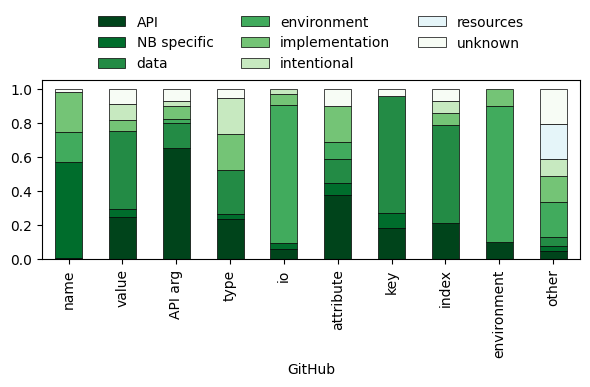

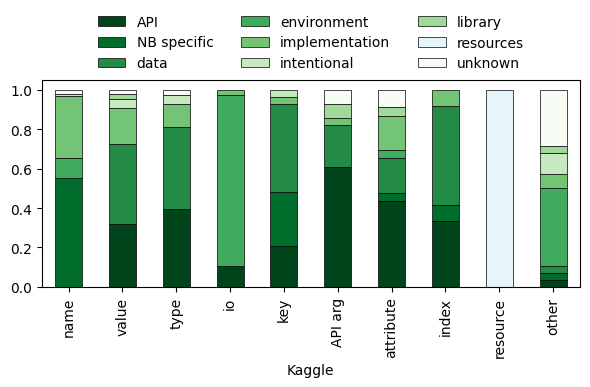

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

rc2colormap = {"API":0,"NB specific":1,"data":2,"environment":3,
             "implementation":4,"library":5,"intentional":6,"resources":7,"unknown":8}

def plot_relationship_stackedbar(x_var, y_var, df, source="Kaggle",include_num=9):
    df_grouped = df.groupby(x_var)[y_var].value_counts().unstack(y_var)
    df_grouped_sorted = df[x_var].value_counts().sort_values(ascending=False)
    df_grouped_sorted = (df_grouped_sorted/df_grouped_sorted.sum()).round(2)
#     print(df_grouped_sorted[:include_num].to_list()+[sum(df_grouped_sorted[include_num:])])
    df_grouped = df_grouped.reindex(df_grouped_sorted.index)
    df_other = pd.DataFrame(df_grouped[include_num:].sum(axis=0)).T.rename(index={0: "other"})
    df_grouped = pd.concat([df_grouped[:include_num], df_other])
    df_grouped = (df_grouped.T/df_grouped.sum(axis=1)).T

    cmap = colors.ListedColormap([cm(rc2colormap[x]) for x in df_grouped.columns])
    
    df_grouped.plot.bar(stacked=True, cmap=cmap, edgecolor='black',linewidth=0.5,figsize=(6,4))
    
    plt.legend(bbox_to_anchor=(0.5, 1.02), loc="lower center", borderaxespad=0, frameon=False, ncol=3)
    plt.xlabel(source)
    plt.tight_layout()
    plt.show()
    
plot_relationship_stackedbar("label_refined_exp_type", "label_root_cause", df_mlerr_labels_g_sum, "GitHub")
plot_relationship_stackedbar("label_refined_exp_type", "label_root_cause", df_mlerr_labels_k_sum, "Kaggle")

In [15]:
# Summarize the statistics - df_mlerr_labels_sum
# github stats
cluster_res_g_sum = visualization_util.statistics_labels(df_mlerr_label_config_sum, df_mlerr_labels_g_sum)
for label_key in df_mlerr_label_config_sum:
    cluster_res_g_sum[label_key] = pd.DataFrame.from_dict(cluster_res_g_sum[label_key]).rename_axis('cluster_id').reset_index()
# for all clusters    
cluster_res_g_sum_weighted_sum = visualization_util.cal_weighted_sum(df_mlerr_label_config_sum, cluster_res_g_sum)

# kaggle stats
cluster_res_k_sum = visualization_util.statistics_labels(df_mlerr_label_config_sum, df_mlerr_labels_k_sum)
for label_key in df_mlerr_label_config_sum:
    cluster_res_k_sum[label_key] = pd.DataFrame.from_dict(cluster_res_k_sum[label_key]).rename_axis('cluster_id').reset_index()
cluster_res_k_sum_weighted_sum = visualization_util.cal_weighted_sum(df_mlerr_label_config_sum, cluster_res_k_sum)

In [16]:
rc = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_root_cause'],
                   cluster_res_g_sum_weighted_sum['label_root_cause']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
rc['Kaggle']=(rc['Kaggle']/rc['Kaggle'].sum()).round(2)
rc['GitHub']=(rc['GitHub']/rc['GitHub'].sum()).round(2)
rc

,Kaggle,GitHub
API,0.21,0.18
data,0.19,0.17
NB specific,0.18,0.20
environment,0.16,0.17
implementation,0.15,0.15
unknown,0.05,0.06
resources,0.03,0.02
intentional,0.03,0.05
library,0.01,0.00


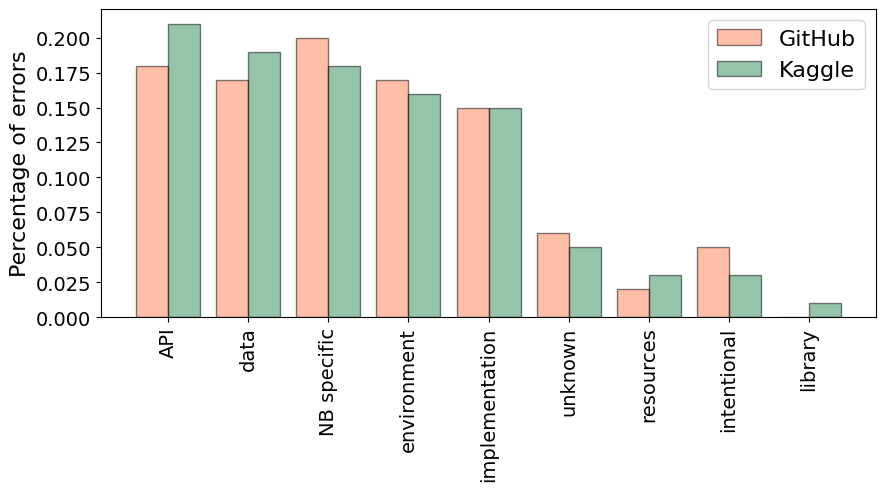

In [19]:
ind = np.arange(len(rc.index))

width = 0.4
fontsize = 16
plt.figure(figsize=(10,4))
plt.bar(ind - width / 2, rc.GitHub, width, label = 'GitHub', alpha = 0.5, color = 'coral', edgecolor = 'black') 
plt.bar(ind + width / 2, rc.Kaggle, width, label = 'Kaggle', alpha = 0.5, color = 'seagreen', edgecolor = 'black') 
  
plt.xticks(ind, rc.index, rotation=90, fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# plt.xlabel("Exception types", fontsize=fontsize) 
plt.ylabel("Percentage of errors", fontsize=fontsize) 
plt.legend(fontsize=fontsize) 
plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/ml_root cause.pdf", bbox_inches='tight')
plt.show()

In [20]:
bt = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_refined_exp_type'],
                   cluster_res_g_sum_weighted_sum['label_refined_exp_type']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
bt['Kaggle']=(bt['Kaggle']/bt['Kaggle'].sum()).round(2)
bt['GitHub']=(bt['GitHub']/bt['GitHub'].sum()).round(2)
bt

,Kaggle,GitHub
name,0.28,0.31
value,0.12,0.11
type,0.12,0.10
io,0.11,0.08
key,0.08,0.06
API arg,0.08,0.10
attribute,0.06,0.07
index,0.03,0.04
resource,0.03,0.02
environment,0.02,0.03


In [21]:
mlbug = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_if_ML_bug'],
                   cluster_res_g_sum_weighted_sum['label_if_ML_bug']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
mlbug['Kaggle']=(mlbug['Kaggle']/mlbug['Kaggle'].sum()).round(2)
mlbug['GitHub']=(mlbug['GitHub']/mlbug['GitHub'].sum()).round(2)
mlbug[:2]

,Kaggle,GitHub
ML bug,0.71,0.59
python bug,0.29,0.41


In [22]:
pd.DataFrame([cluster_res_k_sum_weighted_sum['label_ML_pipeline'],
                     cluster_res_g_sum_weighted_sum['label_ML_pipeline']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})

,Kaggle,GitHub
data preparation,93,111
evaluation/prediction,73,41
training,68,50
data visualization,43,40
model construction,32,20
not applicable,24,95
environment setup,19,31
unknown,2,1


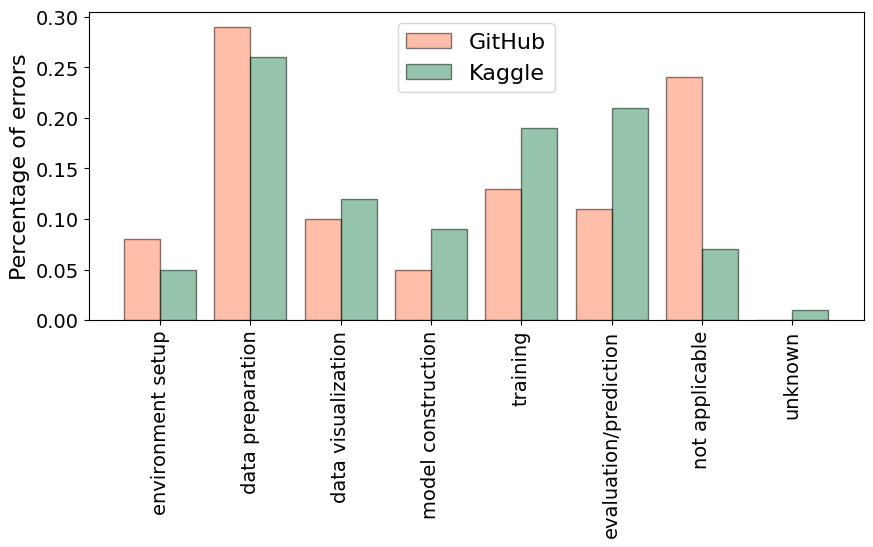

,Kaggle,GitHub
environment setup,0.05,0.08
data preparation,0.26,0.29
data visualization,0.12,0.10
model construction,0.09,0.05
training,0.19,0.13
evaluation/prediction,0.21,0.11
not applicable,0.07,0.24
unknown,0.01,0.00


In [29]:
import numpy as np

mlpp = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_ML_pipeline'],
                     cluster_res_g_sum_weighted_sum['label_ML_pipeline']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
mlpp['Kaggle']=(mlpp['Kaggle']/mlpp['Kaggle'].sum()).round(2)
mlpp['GitHub']=(mlpp['GitHub']/mlpp['GitHub'].sum()).round(2)
mlpp = mlpp.reindex(["environment setup", "data preparation", "data visualization", "model construction", "training", 
                     "evaluation/prediction", "not applicable", "unknown"])

ind = np.arange(len(mlpp.index))

width = 0.4
fontsize = 16
plt.figure(figsize=(10,4))
plt.bar(ind - width / 2, mlpp.GitHub, width, label = 'GitHub', alpha = 0.5, color = 'coral', edgecolor = 'black') 
plt.bar(ind + width / 2, mlpp.Kaggle, width, label = 'Kaggle', alpha = 0.5, color = 'seagreen', edgecolor = 'black') 
  
plt.xticks(ind, mlpp.index, rotation=90, fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# plt.xlabel("Exception types", fontsize=fontsize) 
plt.ylabel("Percentage of errors", fontsize=fontsize) 
plt.legend(fontsize=fontsize) 
plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/ml_pipeline.pdf", bbox_inches='tight')
plt.show()

mlpp

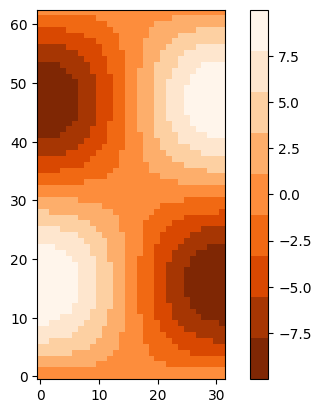

In [26]:
# define cmap with RGB values

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

mycolors_2 = np.array([
    [255,245,235],
    [254,230,206],
    [253,208,162],
    [253,174,107],
    [253,141,60],
    [241,105,19],
    [217,72,1],
    [166,54,3],
    [127,39,4]])/255
cm_2 = LinearSegmentedColormap.from_list('mycolors_2', mycolors_2[::-1], N=len(mycolors_2))

# Fewer bins will result in "coarser" colomap interpolation
im = plt.imshow(Z, interpolation='nearest', origin='lower', cmap=cm_2)
plt.colorbar(im)

In [27]:
df_mlerr_label_config_sum.keys()

Index(['label_root_cause', 'label_ML_pipeline', 'label_if_ML_bug',
       'label_refined_exp_type', 'label_if_runinfo_help',
       'label_if_code_error_align', 'other'],
      dtype='object')

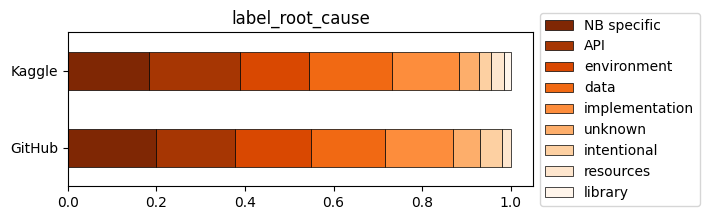

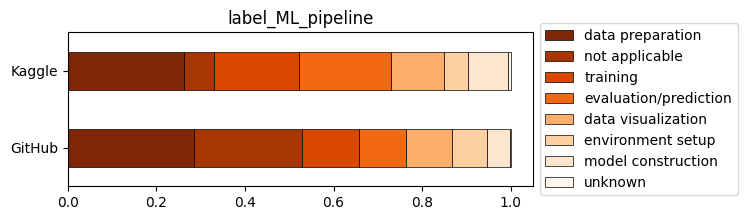

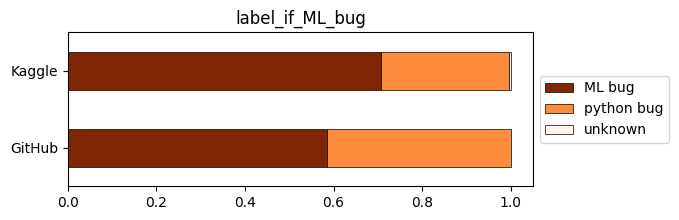

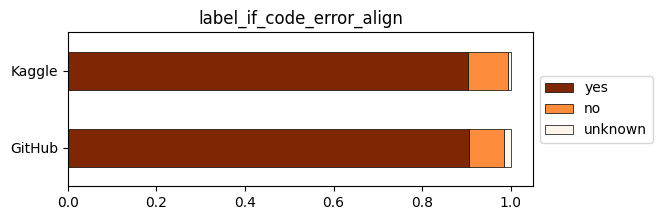

In [30]:
import matplotlib.pyplot as plt

# plot stacked bar chart to compare GitHub and Kaggle over each categories
for label_key in ['label_root_cause', 'label_ML_pipeline', 'label_if_ML_bug','label_if_code_error_align']:
    bar_label_key_gk = pd.DataFrame({"GitHub": cluster_res_g_sum_weighted_sum[label_key],
                                     "Kaggle": cluster_res_k_sum_weighted_sum[label_key]})
    bar_label_key_gk = bar_label_key_gk.div(bar_label_key_gk.sum(axis=0), axis=1)
    # plot
    ax = bar_label_key_gk.T.plot(kind="barh", stacked=True, figsize=(6,2), 
                            colormap=cm_2, edgecolor='black',linewidth=0.5)
#     for bar, disease in zip(ax.patches[:5], np.concatenate((np.array(bar_label_key_gk['Kaggle']),np.array(bar_label_key_gk['GitHub']))).round(2)):
#         ax.text(bar.get_x(), bar.get_y()+bar.get_height()/2, disease, color = 'white', ha = 'left', va = 'center') 
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title(label_key)
    plt.show()

In [33]:
# config
df_mlerr_label_config = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_config.xlsx'),
                                keep_default_na=False)
exclude_config = ["label_if_error_chain"] # because it is the same as root cause==nb specific-previous cell error
df_mlerr_label_config.drop(exclude_config, axis=1, inplace=True)
# data
df_mlerr_labels_g = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_g.xlsx'))
df_mlerr_labels_k = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_k.xlsx'))

# before filtering
print(df_mlerr_labels_g.eid.nunique())
print(df_mlerr_labels_k.eid.nunique())

# exclude_ml_pipeline = ['not-applicable (sub-labels needed, e.g., tutorials, physics simulation, ..)',
#                        'not applicable - tutorial notebook',
#                        'not applicable - physics',
#                        'not applicable - education',
#                        'unknown']
exclude_ml_pipeline=[]
exclude_other = ['should exclude'] #[should exclude']
df_mlerr_labels_g = df_mlerr_labels_g[(~df_mlerr_labels_g.label_ML_pipeline.isin(exclude_ml_pipeline))&(~df_mlerr_labels_g.other.isin(exclude_other))]
df_mlerr_labels_k = df_mlerr_labels_k[(~df_mlerr_labels_k.label_ML_pipeline.isin(exclude_ml_pipeline))&(~df_mlerr_labels_k.other.isin(exclude_other))]

# after filtering
print(df_mlerr_labels_g.eid.nunique())
print(df_mlerr_labels_k.eid.nunique())

390
356
389
354


In [56]:
nb_g = df_mlerr_labels_g[df_mlerr_labels_g["label_root_cause"].isin(config.label_root_cause["NB specific"])]
nb_g_counts = nb_g.groupby("label_root_cause")["label_root_cause"].value_counts().sort_values(ascending=False)
nb_g_counts = (nb_g_counts/nb_g_counts.sum()).round(2)
nb_k = df_mlerr_labels_k[df_mlerr_labels_k["label_root_cause"].isin(config.label_root_cause["NB specific"])]
nb_k_counts = nb_k.groupby("label_root_cause")["label_root_cause"].value_counts().sort_values(ascending=False)
nb_k_counts = (nb_k_counts/nb_k_counts.sum()).round(2)

nb_pp = pd.DataFrame([nb_g_counts,nb_k_counts],index=['GitHub','Kaggle']).T
nb_pp

,GitHub,Kaggle
label_root_cause,,
nb specific - execution order,0.58,0.71
nb specific - previous cell error,0.36,0.25
nb specific - need execute future cells,0.05,0.05


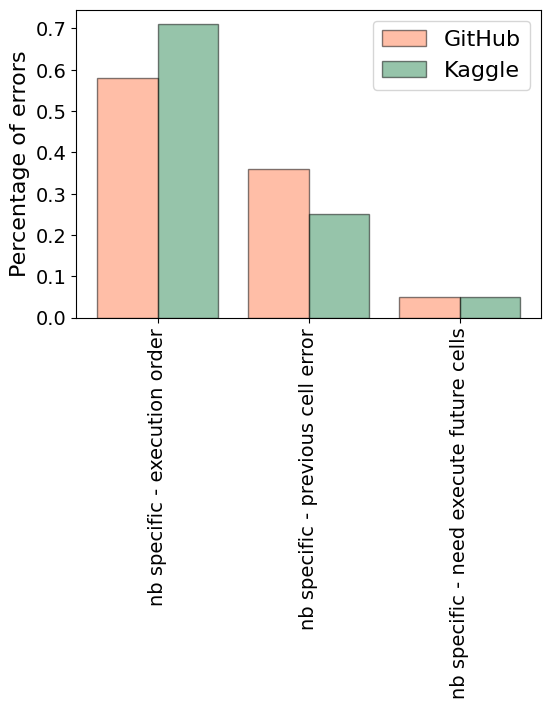

In [57]:
# plot nb specific
ind = np.arange(len(nb_pp.index))

width = 0.4
fontsize = 16
plt.figure(figsize=(6,4))
plt.bar(ind - width / 2, nb_pp.GitHub, width, label = 'GitHub', alpha = 0.5, color = 'coral', edgecolor = 'black') 
plt.bar(ind + width / 2, nb_pp.Kaggle, width, label = 'Kaggle', alpha = 0.5, color = 'seagreen', edgecolor = 'black') 
  
plt.xticks(ind, nb_pp.index, rotation=90, fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# plt.xlabel("Exception types", fontsize=fontsize) 
plt.ylabel("Percentage of errors", fontsize=fontsize) 
plt.legend(fontsize=fontsize) 
plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/ml_pipeline.pdf", bbox_inches='tight')
plt.show()